In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_clean.csv')

In [3]:
df.head()

,Unnamed: 0,Company Name,Job Title,Job Description,Salary Estimate,Location,Revenue,min_salary,max_salary,python,sql,Machine Learning,TensorFlow
0,0,UTURNGROUP,Data Scientist,Responsibilities for Data Scientist/ NLP Engin...,₹223K (Employer est.),Pune,NaN,223,223,1,1,1,0
1,1,Yash Technologies,Associate Data Scientist,Responsibilities for Data Scientist/ NLP Engin...,₹223K (Employer est.),Pune,NaN,223,223,1,1,1,0
2,2,"JPMorgan Chase Bank, N.A.",Data Scientist Associate - Wholesale Payments,Responsibilities for Data Scientist/ NLP Engin...,₹223K (Employer est.),Mumbai,NaN,223,223,1,1,1,0
3,3,KPIT Technologies GmbH,Data Scientist,Responsibilities for Data Scientist/ NLP Engin...,₹223K (Employer est.),Pune,NaN,223,223,1,1,1,0
4,4,NICE,Specialist Data Scientist,Responsibilities for Data Scientist/ NLP Engin...,₹223K (Employer est.),Pune,NaN,223,223,1,1,1,0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df['Job Title']

0                                         Data Scientist
1                               Associate Data Scientist
2          Data Scientist Associate - Wholesale Payments
3                                         Data Scientist
4                              Specialist Data Scientist
                             ...                        
145                       ENGINEER - AI/MACHINE-LEARNING
146                       Data Scientist II - APAC-based
147                                       Data Scientist
148                                       Data Scientist
149    Artificial Intelligence & Machine Learning Exp...
Name: Job Title, Length: 150, dtype: object

In [6]:
df['Job Title'] = df['Job Title'].astype(str)

In [7]:
def title_filter(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'natural language' in title.lower():
        return 'nle'
    elif 'analyst' in title.lower() or 'analysis' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'NaN'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior'in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    elif 'associate' in title.lower():
        return 'associative'
    else:
        return 'NaN'

In [8]:
df['job_simpl'] = df['Job Title'].apply(title_filter)

In [9]:
df.job_simpl.value_counts()

data scientist    94
NaN               32
mle               20
analyst            3
nle                1
Name: job_simpl, dtype: int64

In [10]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

NaN            127
senior          12
junior           7
associative      4
Name: seniority, dtype: int64

In [11]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [12]:
df['avg_salary'] = df['min_salary']+df['max_salary']/2

In [13]:
df.describe()

,min_salary,max_salary,python,sql,Machine Learning,TensorFlow,desc_len,avg_salary
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,380.600000,716.600000,0.846667,0.246667,0.846667,0.600000,653.386667,738.900000
std,147.357393,350.957807,0.361516,0.432515,0.361516,0.491539,309.159019,320.954177
min,180.000000,223.000000,0.000000,0.000000,0.000000,0.000000,432.000000,334.500000
25%,223.000000,360.000000,1.000000,0.000000,1.000000,0.000000,432.000000,360.000000
50%,500.000000,1000.000000,1.000000,0.000000,1.000000,1.000000,432.000000,1000.000000
75%,500.000000,1000.000000,1.000000,0.000000,1.000000,1.000000,803.000000,1000.000000
max,500.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1279.000000,1000.000000


In [14]:
df.columns

Index(['Company Name', 'Job Title', 'Job Description', 'Salary Estimate',
       'Location', 'Revenue', 'min_salary', 'max_salary', 'python', 'sql',
       'Machine Learning', 'TensorFlow', 'job_simpl', 'seniority', 'desc_len',
       'avg_salary'],
      dtype='object')

<AxesSubplot:>

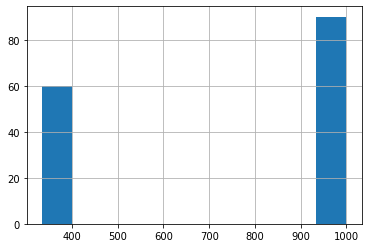

In [15]:
df.avg_salary.hist()

<AxesSubplot:>

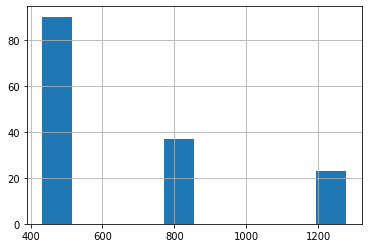

In [16]:
df.desc_len.hist()

<AxesSubplot:>

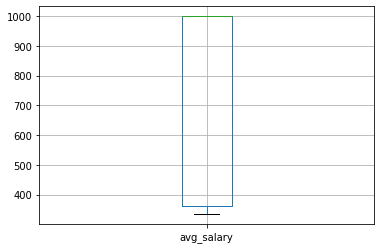

In [17]:
df.boxplot(column = ['avg_salary'])

In [18]:
df[['avg_salary','desc_len']].corr()

,avg_salary,desc_len
avg_salary,1.000000,-0.870249
desc_len,-0.870249,1.000000


In [ ]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['desc_len','avg_salary']].corr(),vmax=.3,center=0,cmap=cmap,square=True,linewidth=.5,cbar_kws={"shrink":.5})

In [ ]:
df.columns

In [ ]:
df_cat = df[['Company Name','Location', 'Revenue','python', 'sql',
       'Machine Learning', 'TensorFlow', 'job_simpl', 'seniority']]

In [ ]:
for i in df_cat.columns:
    cat_index = df_cat[i].value_counts()
    print('graph for {}: total = {}'.format(i,len(cat_index)))
    chart = sns.barplot(x=cat_index.index,y=cat_index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [ ]:
for i in df_cat[['Location','Company Name']]:
    cat_index = df_cat[i].value_counts()[:20]
    print('graph for {}: total = {}'.format(i,len(cat_index)))
    chart = sns.barplot(x=cat_index.index,y=cat_index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [ ]:
df.columns

In [ ]:
pd.pivot_table(df, index = 'job_simpl',values = 'avg_salary')

In [ ]:
pd.pivot_table(df, index = ['job_simpl','seniority'],values = 'avg_salary')

In [ ]:
pd.pivot_table(df, index = ['Location','job_simpl'],values = 'avg_salary').sort_values('Location',ascending=False)

In [ ]:
df.columns

In [ ]:
df_pivot = df[['Machine Learning','python','sql','TensorFlow','avg_salary']]

In [ ]:
for i in df_pivot.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white",random_state=1,stopwords=STOPWORDS,max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df.to_csv(r'D:\projects\jupyter\salary prediction\eda_data.csv')